<a href="https://colab.research.google.com/github/Baberbaba/Baberbaba/blob/main/ab_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AB Testing Case Study

The file ABtesting.csv contains the results of an experiment where two versions of an online retailer's webpage are compared. Visitors to the retailer's webpage are randomly assigned to a control (old design) or treatment (new design) group. The variable **treat** identifies how each new visitor is assigned. A conversion occurs if a visitor goes on to complete a sale. in which case we have **conversion** = 1, if not, **conversion** = 0.

In [ ]:
##Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
##Load the dataset
df = pd.read_csv ('/content/ABtesting.csv')
df.head()

,time,treat,conversion
0,0.0,control,0
1,1.0,control,0
2,1.0,treatment,0
3,1.0,treatment,0
4,2.0,treatment,0


In the next step, a quick cross-tabulation can show us how many people in the treatment and control groups do and do not convert.

In [ ]:
ct = pd.crosstab(df['treat'], df['conversion'], normalize='index')
ct

conversion,0,1
treat,,
control,0.957292,0.042708
treatment,0.948278,0.051722


Next, we can visualize these results using a bar plot

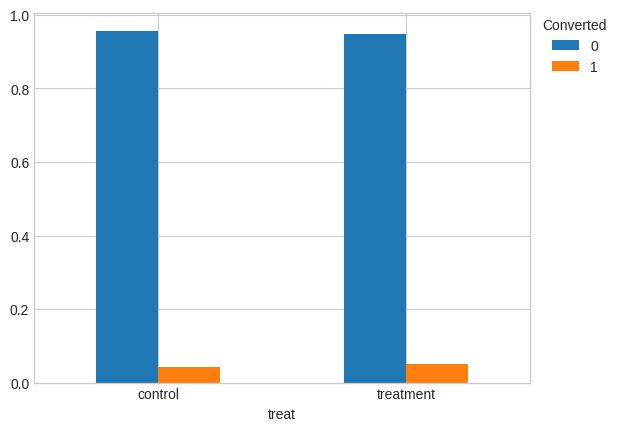

In [ ]:
%matplotlib inline
plt.style.use('seaborn-whitegrid') ## choosing the background style
ax = ct.plot(kind='bar', stacked=False, rot = 0)
ax.legend(title='Converted', bbox_to_anchor=(1, 1.02), loc='upper left')

We can also check the visualize conversion rates for each of the groups

<Axes: xlabel='treat', ylabel='conversion'>

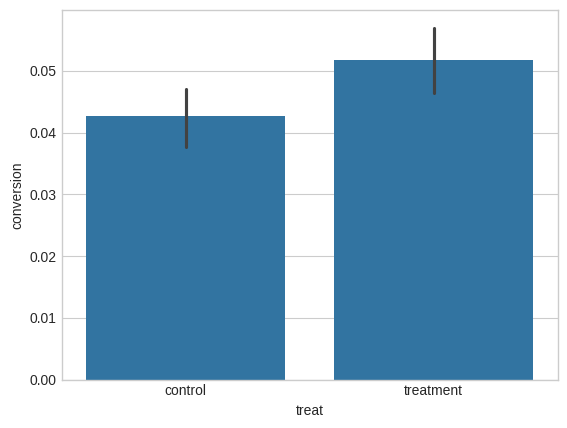

In [ ]:
sns.barplot(data = df, x = 'treat', y = 'conversion')

### Data Preprocessing

In [ ]:
##Take control group in a separate DataFrame
dfc = df[df['treat']=="control"]
dfc.head()

,time,treat,conversion
0,0.0,control,0
1,1.0,control,0
5,2.0,control,0
7,5.0,control,0
9,7.0,control,0


In [ ]:
##Take treatment group in a separate DataFrame
dft = df[df['treat']=="treatment"]
dft.head()

,time,treat,conversion
2,1.0,treatment,0
3,1.0,treatment,0
4,2.0,treatment,0
6,4.0,treatment,0
8,6.0,treatment,0


#### Calculate conversion rate

- Control Group

In [ ]:
##Include a cust_no variable
Nc = len(dfc.index)
dfc['cust_no'] = np.arange(0,Nc)+1
dfc.head()

,time,treat,conversion,cust_no
0,0.0,control,0,1
1,1.0,control,0,2
5,2.0,control,0,3
7,5.0,control,0,4
9,7.0,control,0,5


In [ ]:
##Create cumulative conversion variable
dfc['cumconv'] = np.around(np.cumsum(dfc.conversion),0)
dfc

,time,treat,conversion,cust_no,cumconv
0,0.0,control,0,1,0
1,1.0,control,0,2,0
5,2.0,control,0,3,0
7,5.0,control,0,4,0
9,7.0,control,0,5,0
...,...,...,...,...,...
13994,10464.0,control,0,6997,299
13995,10464.0,control,0,6998,299
13996,10465.0,control,0,6999,299
13998,10468.0,control,0,7000,299


In [ ]:
## Create conversion rate variable
dfc['conv_rate'] = np.round(dfc.cumconv/dfc.cust_no,4)
dfc

,time,treat,conversion,cust_no,cumconv,conv_rate
0,0.0,control,0,1,0,0.0000
1,1.0,control,0,2,0,0.0000
5,2.0,control,0,3,0,0.0000
7,5.0,control,0,4,0,0.0000
9,7.0,control,0,5,0,0.0000
...,...,...,...,...,...,...
13994,10464.0,control,0,6997,299,0.0427
13995,10464.0,control,0,6998,299,0.0427
13996,10465.0,control,0,6999,299,0.0427
13998,10468.0,control,0,7000,299,0.0427


- Treatment Group

In [ ]:
##Include a cust_no variable
Nt = len(dft.index)
dft['cust_no'] = np.arange(0,Nt)+1
dft.head()

,time,treat,conversion,cust_no
2,1.0,treatment,0,1
3,1.0,treatment,0,2
4,2.0,treatment,0,3
6,4.0,treatment,0,4
8,6.0,treatment,0,5


In [ ]:
##Create cumulative conversion variable
dft['cumconv'] = np.around(np.cumsum(dft.conversion),0)
dft

,time,treat,conversion,cust_no,cumconv
2,1.0,treatment,0,1,0
3,1.0,treatment,0,2,0
4,2.0,treatment,0,3,0
6,4.0,treatment,0,4,0
8,6.0,treatment,0,5,0
...,...,...,...,...,...
13989,10459.0,treatment,0,6995,362
13990,10460.0,treatment,0,6996,362
13991,10460.0,treatment,0,6997,362
13993,10461.0,treatment,0,6998,362


In [ ]:
##Create a conversion rate variable
dft['conv_rate'] = round(dft.cumconv/dft.cust_no,4)
dft

,time,treat,conversion,cust_no,cumconv,conv_rate
2,1.0,treatment,0,1,0,0.0000
3,1.0,treatment,0,2,0,0.0000
4,2.0,treatment,0,3,0,0.0000
6,4.0,treatment,0,4,0,0.0000
8,6.0,treatment,0,5,0,0.0000
...,...,...,...,...,...,...
13989,10459.0,treatment,0,6995,362,0.0518
13990,10460.0,treatment,0,6996,362,0.0517
13991,10460.0,treatment,0,6997,362,0.0517
13993,10461.0,treatment,0,6998,362,0.0517


In [ ]:
##Let's look at a few additional conversion statistics for the treatment group
dft.describe()

,time,conversion,cust_no,cumconv,conv_rate
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,5253.023718,0.051722,3500.000000,169.329047,0.045251
std,2997.437325,0.221480,2020.581599,105.773435,0.006714
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2660.000000,0.000000,1750.500000,79.000000,0.043400
50%,5276.000000,0.000000,3500.000000,166.000000,0.047700
75%,7786.000000,0.000000,5249.500000,264.000000,0.049600
max,10466.000000,1.000000,6999.000000,362.000000,0.057100


### Data Visualization

Here we plot the cumulative conversion against the number of visitors. It is also possible to do a plot against time, but it looks about the same. The second visualization is of the conversion rate against the number of vistors.

- Plot for cumulative conversion

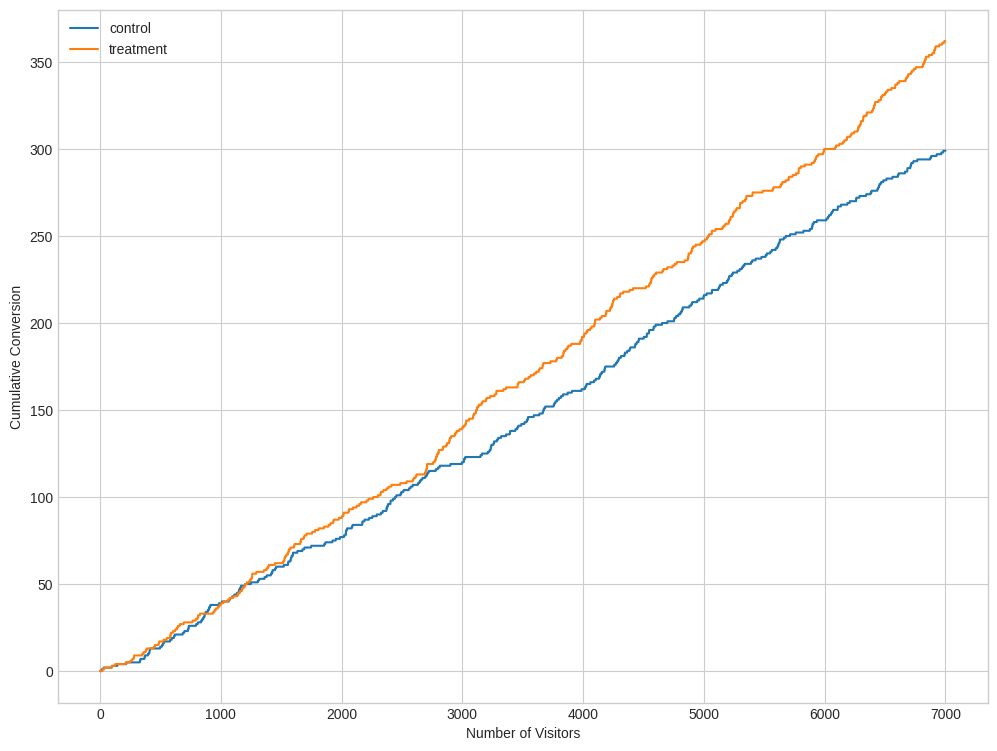

In [ ]:
fig = plt.figure(figsize = (12,9))
ax = plt.axes()
x = dfc.cust_no
y = dfc.cumconv
ax.plot(x, y, label='control')

x = dft.cust_no
y = dft.cumconv
ax.plot(x, y, label='treatment')

ax.set_xlabel("Number of Visitors")
ax.set_ylabel("Cumulative Conversion")
ax.legend(loc='best')

- Plot for conversion rate

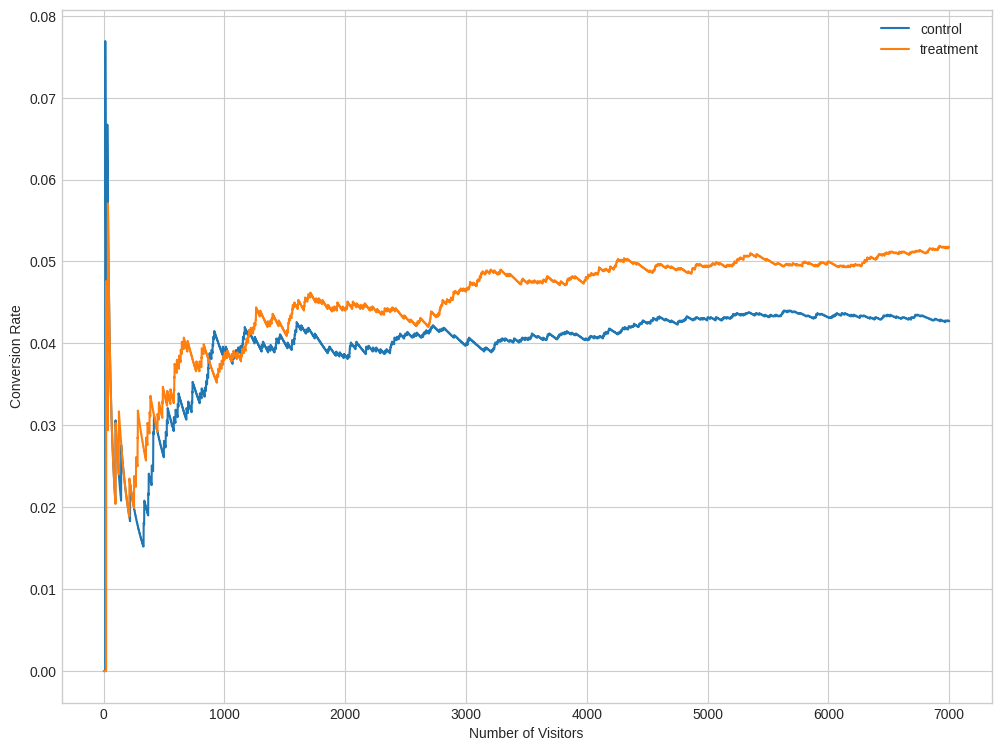

In [ ]:
fig = plt.figure(figsize = (12,9))
ax = plt.axes()
x = dfc.cust_no
y = dfc.conv_rate
ax.plot(x, y, label='control')

x = dft.cust_no
y = dft.conv_rate
ax.plot(x, y, label='treatment')

ax.set_xlabel("Number of Visitors")
ax.set_ylabel("Conversion Rate")
ax.legend(loc='best')

### Two-sample hypothesis tests and confidence intervals for differences in proportion

Let's perform the hypothesis test using statmodels in Python. Difference in rates are computed as control minus treatment. So a negative value indicates an increase in conversion rates.

In [ ]:
##Import the library and methods
from statsmodels.stats.proportion import test_proportions_2indep, confint_proportions_2indep

In [ ]:
## Input values

Sc = dfc.conversion.sum() ##No. of successes in control group
Nc = Nc ## No of samples in control group. Already calculated earlier

St = dft.conversion.sum() ##No. of successes in treatment group
Nt = Nt ## No of samples in treatment group. Already calculated earlier

In [ ]:
##Calculate the Z-Statistic and p-value
z_stat, pval = test_proportions_2indep(Sc, Nc, St, Nt, compare='diff', alternative='two-sided')

In [ ]:
##Calculate the confidence interval
(lower, upper) = confint_proportions_2indep(Sc, Nc, St, Nt, compare='diff', alpha=0.05)

In [ ]:
## Print the results
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'95% CI for difference in proportion: [{lower:.3f}, {upper:.3f}]')

z statistic: -2.51
p-value: 0.012
95% CI for difference in proportion: [-0.016, -0.002]


### Conclusion

- Since, p-value < 0.05, the difference between the control and treatment group is statistically significant at the 5% level.
- The difference in conversion rate lies somewhere between 0.002 and 0.016